In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_eda.csv')
df

,PublishedAgo,Rating,Employer,JobTitle,Founded,Type,Industry,Sector,MinSalary,MaxSalary,...,Country,MinSize,MaxSize,MinRevenue,MaxRevenue,Experience,Profession,AvgSalary,AvgSize,AvgRevenue
0,5d,4.3,KGS Technology Group Inc,Junior Software Engineer,2008.0,Company - Private,Information Technology Support Services,Information Technology,60.0,80.0,...,Remote,51.0,200.0,1.000000e+06,5.000000e+06,Junior,Software Engineer,70.0,125.5,3.000000e+06
1,4d,4.2,"QSC, LLC",AI Engineer,1968.0,Company - Private,Electronics Manufacturing,Manufacturing,102.0,147.0,...,Remote,501.0,1000.0,NaN,NaN,NaN,AI Engineer,124.5,750.5,NaN
2,30d+,4.2,MIT Lincoln Laboratory,AI Engineer,1951.0,Nonprofit Organization,Aerospace & Defense,Aerospace & Defense,94.0,138.0,...,United States,1001.0,5000.0,NaN,NaN,NaN,AI Engineer,116.0,3000.5,NaN
3,6d,4.2,Hewlett Packard Enterprise,AI Solution Engineer,2015.0,Company - Public,Information Technology Support Services,Information Technology,123.0,283.0,...,United States,10000.0,10000.0,NaN,NaN,NaN,AI Engineer,203.0,10000.0,NaN
4,2d,3.3,Oran Inc,AI/ML Cloud Engineer,2004.0,Company - Private,Business Consulting,Management & Consulting,140.0,140.0,...,Remote,1.0,50.0,1.000000e+06,5.000000e+06,NaN,AI Engineer,140.0,25.5,3.000000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,9d,4.0,PayPal,AI Machine Learning Engineer,1998.0,Company - Public,Internet & Web Services,Information Technology,97.0,234.0,...,United States,10000.0,10000.0,1.000000e+10,1.000000e+10,NaN,ML Engineer,165.5,10000.0,1.000000e+10
607,12d,3.5,Eightfold.AI,Machine Learning Engineer,2016.0,Company - Private,Enterprise Software & Network Solutions,Information Technology,121.0,163.0,...,United States,501.0,1000.0,NaN,NaN,NaN,ML Engineer,142.0,750.5,NaN
608,30d+,4.4,Adobe,Research Scientist/Engineer,1982.0,Company - Public,Computer Hardware Development,Information Technology,121.0,239.0,...,United States,10000.0,10000.0,5.000000e+09,1.000000e+10,NaN,Research Engineer,180.0,10000.0,7.500000e+09
609,30d+,4.5,Curai,Machine Learning Engineer (Remote),2017.0,Company - Private,Hospitals & Health Clinics,Healthcare,150.0,200.0,...,United States,51.0,200.0,NaN,NaN,NaN,ML Engineer,175.0,125.5,NaN


In [3]:
df.columns

Index(['PublishedAgo', 'Rating', 'Employer', 'JobTitle', 'Founded', 'Type',
       'Industry', 'Sector', 'MinSalary', 'MaxSalary', 'City', 'State',
       'Country', 'MinSize', 'MaxSize', 'MinRevenue', 'MaxRevenue',
       'Experience', 'Profession', 'AvgSalary', 'AvgSize', 'AvgRevenue'],
      dtype='object')

In [4]:
df.loc[df['AvgRevenue'].isna(), 'AvgRevenue'] = -1

In [5]:
df_model = df[['Rating', 'Employer', 'Industry', 'Sector', 'Type', 'City', 'State', 'Country', 'AvgSize', 'AvgRevenue', 'AvgSalary', 'Experience', 'Profession']]
df_model

,Rating,Employer,Industry,Sector,Type,City,State,Country,AvgSize,AvgRevenue,AvgSalary,Experience,Profession
0,4.3,KGS Technology Group Inc,Information Technology Support Services,Information Technology,Company - Private,Remote,Remote,Remote,125.5,3.000000e+06,70.0,Junior,Software Engineer
1,4.2,"QSC, LLC",Electronics Manufacturing,Manufacturing,Company - Private,Remote,Remote,Remote,750.5,-1.000000e+00,124.5,NaN,AI Engineer
2,4.2,MIT Lincoln Laboratory,Aerospace & Defense,Aerospace & Defense,Nonprofit Organization,Lexington,MA,United States,3000.5,-1.000000e+00,116.0,NaN,AI Engineer
3,4.2,Hewlett Packard Enterprise,Information Technology Support Services,Information Technology,Company - Public,San Jose,CA,United States,10000.0,-1.000000e+00,203.0,NaN,AI Engineer
4,3.3,Oran Inc,Business Consulting,Management & Consulting,Company - Private,Remote,Remote,Remote,25.5,3.000000e+06,140.0,NaN,AI Engineer
...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,4.0,PayPal,Internet & Web Services,Information Technology,Company - Public,San Jose,CA,United States,10000.0,1.000000e+10,165.5,NaN,ML Engineer
607,3.5,Eightfold.AI,Enterprise Software & Network Solutions,Information Technology,Company - Private,Santa Clara,CA,United States,750.5,-1.000000e+00,142.0,NaN,ML Engineer
608,4.4,Adobe,Computer Hardware Development,Information Technology,Company - Public,San Jose,CA,United States,10000.0,7.500000e+09,180.0,NaN,Research Engineer
609,4.5,Curai,Hospitals & Health Clinics,Healthcare,Company - Private,San Francisco,CA,United States,125.5,-1.000000e+00,175.0,NaN,ML Engineer


In [6]:
df_dum = pd.get_dummies(df_model)
df_dum

,Rating,AvgSize,AvgRevenue,AvgSalary,Employer_Accede LLC,Employer_Adobe,Employer_Affinity.co,Employer_Alelo,Employer_Arize AI,Employer_Autodesk,...,State_ WA,State_Remote,Country_Remote,Country_United States,Experience_Junior,Experience_Senior,Profession_AI Engineer,Profession_ML Engineer,Profession_Research Engineer,Profession_Software Engineer
0,4.3,125.5,3.000000e+06,70.0,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,True
1,4.2,750.5,-1.000000e+00,124.5,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,False
2,4.2,3000.5,-1.000000e+00,116.0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
3,4.2,10000.0,-1.000000e+00,203.0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,3.3,25.5,3.000000e+06,140.0,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,4.0,10000.0,1.000000e+10,165.5,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
607,3.5,750.5,-1.000000e+00,142.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
608,4.4,10000.0,7.500000e+09,180.0,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
609,4.5,125.5,-1.000000e+00,175.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df_dum.drop('AvgSalary', axis=1)
y = df_dum.AvgSalary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
import statsmodels.api as sm

In [10]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y, X_sm.astype(float))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     87.21
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          7.45e-231
Time:                        12:52:34   Log-Likelihood:                -2485.6
No. Observations:                 611   AIC:                             5073.
Df Residuals:                     560   BIC:                             5298.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               10.0272      2.293      4.373      0.000       5.524      14.531
Rating                                              20.2859      1.391     14.581      0.000      17.553      23.019
AvgSize                                              0.0060      0.001     10.158      0.000       0.005       0.007
AvgRevenue                                       -4.906e-09   5.58e-10     -8.784      0.000      -6e-09   -3.81e-09
Employer_Accede LLC                                -20.8243     11.663     -1.785      0.075     -43.734       2.085
Employer_Adobe                                      -5.1663      3.379     -1.529      0.127     -11.804       1.471
Employer_Affinity.co                                -5.6331      6.110     -0.922      0.357     -17.635       6.369
Employer_Alelo                                      -8.9896      3.333     -2.697      0.007     -15.536      -2.444
Employer_Arize AI                                  -13.7541      5.285     -2.602      0.010     -24.136      -3.373
Employer_Autodesk                                   -6.8325      4.386     -1.558      0.120     -15.448       1.783
Employer_Booz Allen Hamilton                        -1.3404      3.151     -0.425      0.671      -7.530       4.849
Employer_Cisco Systems                               3.5258      3.932      0.897      0.370      -4.197      11.249
Employer_Curai                                       3.2014      1.556      2.057      0.040       0.144       6.259
Employer_Cyberhaven                                 39.8021     11.666      3.412      0.001      16.887      62.717
Employer_Discord                                    -0.1123      3.458     -0.032      0.974      -6.905       6.681
Employer_Eightfold.AI                               -4.2710      4.417     -0.967      0.334     -12.947       4.405
Employer_FreightVerify                             -28.1243      5.945     -4.731      0.000     -39.801     -16.448
Employer_Harman International                       -8.5988      4.742     -1.813      0.070     -17.913       0.716
Employer_Hewlett Packard Enterprise                 14.7331      3.854      3.823      0.000       7.163      22.303
Employer_Honeywell                                 -21.6948      1.520    -14.270      0.000     -24.681     -18.709
Employer_ITHAKA                                     26.6476      4.021      6.627      0.000      18.749      34.546
Employer_KGS Technology Group Inc                  -20.8780      7.268     -2.872      0.004     -35.154      -6.602
Employer_MIT                                        -4.8626      1.831     -2.655      0.008      -8.460      -1.266
Employer_MIT Lincoln Laboratory          

In [11]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(X_train, y_train)

LinearRegression()

In [14]:
np.mean(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error'))

-8.24698294183598

In [84]:
lm_l = Lasso()
lm_l.fit(X_train, y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring='neg_mean_absolute_error'))

-18.333096966960493

In [25]:
from sklearn.preprocessing import StandardScaler

# Crear una instancia del StandardScaler
scaler = StandardScaler()

# Ajustar el escalador a los datos de entrenamiento
scaler.fit(X_train)

# Escalar los datos de entrenamiento y prueba
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

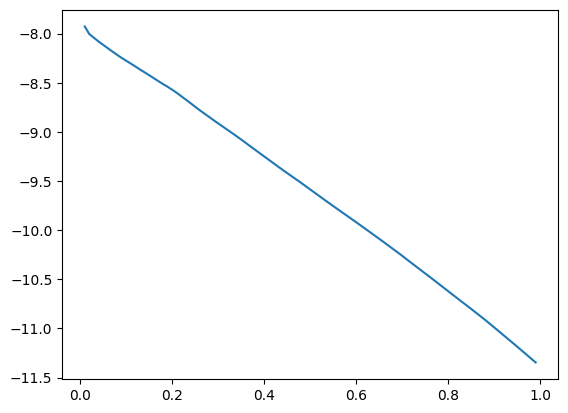

In [41]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100), max_iter=20000)
    error.append(np.mean(cross_val_score(lml, X_train_scaled, y_train, scoring='neg_mean_absolute_error')))
    
plt.plot(alpha, error)

In [42]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns=['alpha', 'error'])
df_err[df_err['error'] == max(df_err['error'])]

,alpha,error
0,0.01,-7.928115


In [43]:
from sklearn.ensemble import RandomForestRegressor

In [72]:
rf = RandomForestRegressor()

In [73]:
np.mean(cross_val_score(rf, X_train , y_train, scoring='neg_mean_absolute_error'))

-6.336199768071087

In [49]:
from sklearn.model_selection import GridSearchCV

In [52]:
parameters = {'n_estimators':range(10,300,10), 'criterion': ('poisson', 'squared_error', 'absolute_error'), 'max_features':(1.0, 'sqrt', 'log2')}

In [53]:
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error')
gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ('poisson', 'squared_error',
                                       'absolute_error'),
                         'max_features': (1.0, 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [54]:
print(gs.best_score_)
print(gs.best_estimator_)

-6.18843940669051
RandomForestRegressor(criterion='absolute_error', n_estimators=20)


Let's try to get a better RandomForest

In [71]:
depths = [estimator.tree_.max_depth for estimator in rf.estimators_]
print(f"Min: {min(depths)}, Max: {max(depths)}")

Min: 11, Max: 21


In [77]:
new_parameters = {
    'n_estimators': range(10, 150, 10),
    'criterion': ['poisson', 'squared_error', 'absolute_error'],
    'max_features': [1.0, 'sqrt', 'log2'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False],
    'min_impurity_decrease': [0.0, 0.1, 0.2]
}

In [78]:
gs = GridSearchCV(rf,new_parameters,scoring='neg_mean_absolute_error')
gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['poisson', 'squared_error',
                                       'absolute_error'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [1.0, 'sqrt', 'log2'],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': range(10, 150, 10)},
             scoring='neg_mean_absolute_error')

In [83]:
print(gs.best_score_)
print(gs.best_estimator_)

-5.686812444748528
RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=40)


In [88]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)
print(tpred_rf)

[171.5        165.         150.775      207.         175.
 165.         102.69565217 150.775      130.         164.625
  73.         164.625      203.         152.5        152.5
 203.         152.60526316 237.75       142.69077381 140.08020833
 195.5         87.5        150.775       73.         150.775
 195.5        152.5        152.5        195.5        165.
 237.75       237.75       147.5        173.5        180.
  73.         203.         175.         203.5        175.
  73.         150.775      203.         152.60526316 237.75
 142.79166667 195.5        175.         175.         195.5
 237.75       203.         237.75       165.5        152.5
 237.75       164.625      142.79166667 130.         152.5
 152.60526316 117.         148.15       152.60526316 237.75
 152.5        237.75       130.         237.75       165.
 164.625      207.         152.60526316 152.60526316 174.
 152.60526316 117.         237.75       147.5         73.
 173.5        237.75       152.60526316 152.5     

In [89]:
from sklearn.metrics import mean_absolute_error

In [91]:
print("Linear regression: ", mean_absolute_error(y_test,tpred_lm))
print("Lasso regression: ", mean_absolute_error(y_test,tpred_lml))
print("Random Forest Regressor: ", mean_absolute_error(y_test,tpred_rf))

print("Linear Regression & Random Forest Regressor: ", mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2))

Linear regression:  9.60076363428834
Lasso regression:  17.909683991511006
Random Forest Regressor:  7.192257621895854
Linear Regression & Random Forest Regressor:  8.391284147255861


In [108]:
check = pd.DataFrame(tuple(zip(y_test, tpred_rf)), columns=['Test', 'Pred'])
check['Diff'] = check['Test'] - check['Pred']
check[abs(check['Diff']) > 1].count()

Test    34
Pred    34
Diff    34
dtype: int64

In [113]:
import pickle

In [115]:
with open('rf_model.p', 'wb') as f:
    pickle.dump(gs.best_estimator_, f)

In [ ]:
with open('rf_model.p', 'rb') as f:
    model = pickle.load(f)